In [47]:
import cv2
import cv2.aruco as ar #importing the aruco module from OpenCV
import numpy as np
import matplotlib.pyplot as plt #to plot images 
%matplotlib inline              

In [48]:
dictionary = ar.Dictionary_get(ar.DICT_6X6_250) #Creating the dictionary object 
img = ar.drawMarker(dictionary,23,700,1)
cv2.imwrite('test_marker.jpg',img)              #Saving the marker

True

You can use the cv2.imshow() function to diplay the loaded image. However, in that case the image will be displayed in a new window. Here, I have used the imshow() function from pyplot module of matplot which allow us to display the plots/images inside the jupyter notebook itself (using the command '%matplotlib inline' given in the first cell).

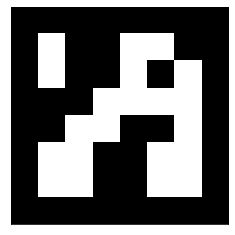

In [41]:
plt.imshow(img,'gray')            #using matplotlib to display the image inline the notebook
plt.xticks([]),plt.yticks([])     #to remove the scales on the x and the y axes
plt.show()

Now, to summarize, I will load the saved image using the cv2.imread() function and display it using the plt.imshow() function and we can verify that the image was correctly saved.

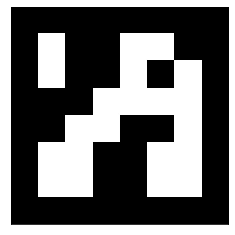

In [49]:
img2 = cv2.imread('test_marker.jpg',0)      #loading the saved marker using OpenCV and displaying it 
plt.imshow(img2,'gray')                     #using matplotlib                        
plt.xticks([]),plt.yticks([])
plt.show()

Now, having learnt how to create and save aruco markers, we can now proceed to see how to detect aruco markers using OpenCV.
The next two cells implement the code for detecting aruco markers in an image since it is more simple (instead of jumping directly to detecting them in a video). 

In [53]:
param = ar.DetectorParameters_create()               #Defining an the parameter object. It contains all the 
                                                     #customizable parameters of the markers
marker = cv2.imread('test_image2.png',-1)
corners, ids, rejectedImgPoints = ar.detectMarkers(marker, dictionary, parameters=param)

#First argument of the detectMarkers() function is the image in which the markers have to be detected, second is the 
#dictionary to which the aruco tags to be scanned belong to, and last is the parameter object. The function 
#returns positions of the corners of the detected markers, the ids of the identified markers and a list
#of potential candidates that were rejected during the identification process
                                                       

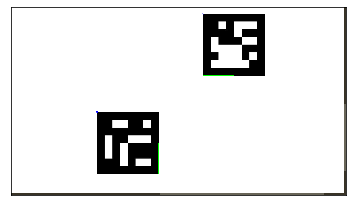

In [55]:
marker = ar.drawDetectedMarkers(marker, corners)  #Function to mark the corners and the boundary of the identified
                                                  #markers on the image
plt.imshow(marker,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

The markings are not visible properly but you can see greenish lines on one of the sides of both the markers and litte blue dots(actually squares) on the corners of both markers.
Now, let's use this implementation to detect markers in a live video:
Note: You can execute the given block of code directly after executing the first cell as both the dictionary and parameter object have been declared again and differently. Als, note that the dictionary used in this implementation contains 5X5 aruco markers(we have been using 6X6 till now). So, it will be able to detect only 5X5 aruco markers. 

In [35]:
vid = cv2.VideoCapture(0)
while(True):
    ret,frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    dictionary1 = ar.Dictionary_get(ar.DICT_5X5_250)
    param1 = ar.DetectorParameters_create()         
    corners,ids,rejectedImgPoints = ar.detectMarkers(gray,dictionary1,parameters=param1)
    gray = ar.drawDetectedMarkers(gray, corners)    #Draw the corner and the boundary of the detected marker 
                                                    #in the frame
    cv2.imshow('frame',gray)                        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()